In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Load the data into DataFrames
results = pd.read_csv('men_results.csv')
results.info()

# Convert date column to datetime
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


In [140]:
# Create a decade column and a total goals column
results['decade'] = results['date'].apply(lambda x: x.year//10*10)
results['year'] = results['date'].apply(lambda x: x.year)
results['total_goals'] = results['home_score'] + results['away_score']
results.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
# Dataframe with all the World Cups
world_cup = results[results['tournament'] == 'FIFA World Cup']['year'].unique()

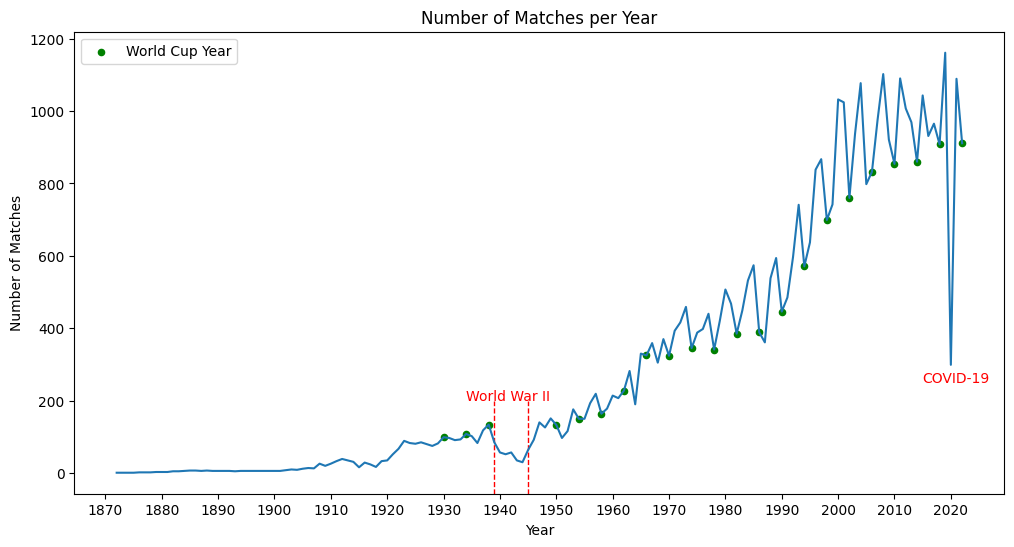

In [142]:
# Count number of matches per year
matches_count = results.groupby('year')['year'].count()

# Plot number of matches per year
plt.figure(figsize=(12, 6))

plt.axvline(x=1939, color='r', linestyle='dashed', linewidth=1, ymax=0.2)
plt.axvline(x=1945, color='r', linestyle='dashed', linewidth=1, ymax=0.2)
plt.text(1934, 200, 'World War II', color='red')

plt.plot(matches_count)
plt.scatter(world_cup, matches_count[world_cup], color='green', label='World Cup Year', s=20)
plt.xticks(np.arange(1870, 2024, 10))
plt.xlabel('Year')

plt.ylabel('Number of Matches')
plt.title('Number of Matches per Year')
plt.legend()
plt.text(2015, 250, 'COVID-19', color='red')
plt.show()

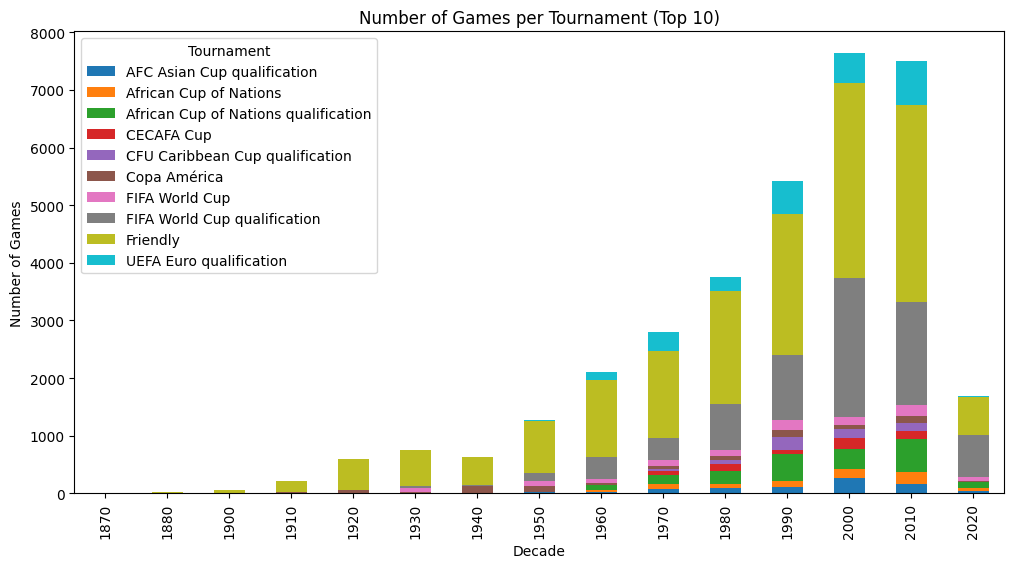

In [143]:
# Count the number of games per tournament and decade
games_per_tournament = results.groupby(['tournament', 'decade']).size().reset_index(name='num_games')

# Get the top 10 tournaments by number of games
top_10_tournaments = games_per_tournament.groupby('tournament')['num_games'].sum().nlargest(10).index

# Filter the data to include only the top 10 tournaments
games_per_tournament_filtered = games_per_tournament[games_per_tournament['tournament'].isin(top_10_tournaments)]

# Pivot the data to have tournaments as columns
games_per_tournament_pivot = games_per_tournament_filtered.pivot(index='decade', columns='tournament', values='num_games')

# Plot the number of games per tournament
games_per_tournament_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Games')
plt.title('Number of Games per Tournament (Top 10)')
plt.legend(title='Tournament')
plt.show()

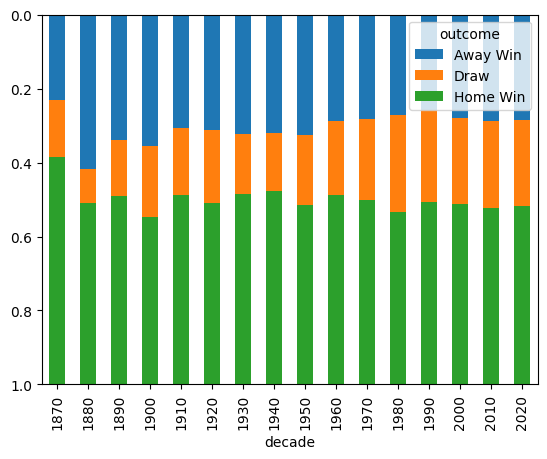

In [144]:
results['outcome'] = np.where(results['home_score'] > results['away_score'], 'Home Win', np.where(results['home_score'] < results['away_score'], 'Away Win', 'Draw'))
ax = results.groupby('decade')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
ax.set_ylim(1, 0)
plt.show()

Goal Analysis:

Identify teams with the highest average goals per match.

Plot goal distribution by team and year.

Tournament Analysis:


Analyze the participation and performance of teams in different tournaments.

Temporal Analysis:

Analyze if there's any trend in the number of goals scored over time.

Investigate if there's a change in the average attendance over different decades.

Geographical Analysis:

Visualize the distribution of matches played across different continents or countries.

Analyze the performance of teams from different continents or regions.

Match Outcome Analysis:

Investigate if certain teams tend to have more draws compared to others.

Seasonality:

Investigate if there are seasonal patterns in match outcomes or attendance.

In [145]:
# Count the number of wins for each team
team_wins = results[results['outcome'] == 'Home Win']['home_team'].value_counts() + results[results['outcome'] == 'Away Win']['away_team'].value_counts()
team_wins = team_wins.fillna(0)

# Get the teams with the most wins 
teams_with_most_wins = team_wins.nlargest(10)
teams_with_most_wins.astype('int32')


Brazil         654
England        597
Germany        574
Argentina      551
Sweden         518
South Korea    478
Mexico         477
Hungary        453
Italy          445
France         442
Name: count, dtype: int32

In [146]:
# Count the number of losses for each team
team_losses = results[results['outcome'] == 'Home Win']['away_team'].value_counts() + results[results['outcome'] == 'Away Win']['home_team'].value_counts()
team_losses = team_losses.fillna(0)

# Get the teams with the most losses
team_with_most_losses = team_losses.nlargest(10)
team_with_most_losses.astype('int32')

Finland             414
Switzerland         356
Northern Ireland    346
Norway              336
Luxembourg          332
Chile               324
Wales               319
Sweden              308
Austria             303
Hungary             301
Name: count, dtype: int32

In [147]:
# Count the number of games played by each team
team_games = pd.concat([results['home_team'].value_counts(), results['away_team'].value_counts()], axis=1).sum(axis=1)
team_games = team_games.sort_values(ascending=False)
team_games.astype('int32')

Sweden       1053
England      1049
Brazil       1021
Argentina    1018
Germany       986
             ... 
Aymara          2
Niue            2
Madrid          1
Asturias        1
Surrey          1
Length: 316, dtype: int32

In [148]:
# Create a DataFrame with the number of wins, losses, ties, games and win rate played by each team
teams = pd.concat([team_wins, team_losses, team_games - team_losses, team_games], axis=1)
teams.columns = ['Wins', 'Losses', 'Ties', 'Games']
teams.fillna(0, inplace=True)
teams = teams.astype('int32')
teams.sort_values('Wins', ascending=False)

# Create a win rate column
teams['Win Rate'] = round(teams['Wins'] / teams['Games'] * 100, 2)
teams = teams.sort_values('Wins', ascending=False)
teams

,Wins,Losses,Ties,Games,Win Rate
Brazil,654,161,860,1021,64.05
England,597,201,848,1049,56.91
Germany,574,206,780,986,58.22
Argentina,551,214,804,1018,54.13
Sweden,518,308,745,1053,49.19
...,...,...,...,...,...
Central Spain,0,0,2,2,0.00
Canary Islands,0,0,4,4,0.00
United Koreans in Japan,0,3,8,11,0.00
Brunei Darussalam,0,0,2,2,0.00


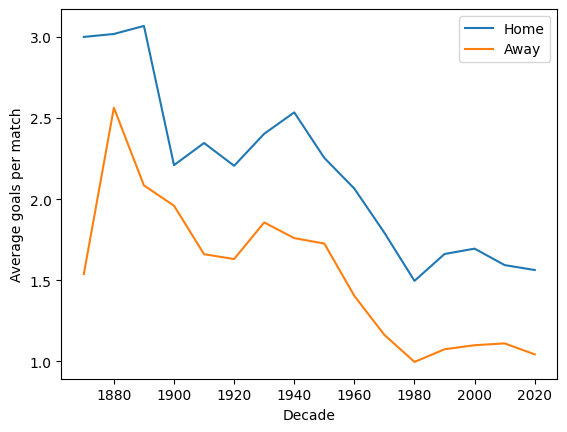

In [149]:
home_goals = results.groupby('decade')['home_score'].mean()
away_goals = results.groupby('decade')['away_score'].mean()

# Plot the average goals per decade for home and away teams
plt.plot(home_goals.index, home_goals.values)
plt.plot(away_goals.index, away_goals.values)
plt.ylabel('Average goals per match')
plt.xlabel('Decade')
plt.legend(['Home', 'Away'])
plt.show()

In [150]:
most_scoring_teams = round((results.groupby('home_team')['home_score'].sum() + results.groupby('away_team')['away_score'].sum()) / (results['home_team'].value_counts() + results['away_team'].value_counts()), 2)
most_scoring_teams = most_scoring_teams.sort_values(ascending=False).head(10)
most_scoring_teams

Yorkshire             3.86
Parishes of Jersey    3.67
Cascadia              3.29
Sápmi                 3.23
Isle of Man           3.18
Artsakh               2.91
Northern Cyprus       2.88
Padania               2.74
Kernow                2.73
Gotland               2.70
dtype: float64

In [151]:
least_scoring_teams = round((results.groupby('home_team')['home_score'].sum() + results.groupby('away_team')['away_score'].sum()) / (results['home_team'].value_counts() + results['away_team'].value_counts()), 2)
least_scoring_teams = least_scoring_teams.sort_values().head(10)
least_scoring_teams

Manchukuo                    0.00
Sark                         0.00
Darfur                       0.14
San Marino                   0.15
Saint Pierre and Miquelon    0.29
Vatican City                 0.33
Andorra                      0.33
Liechtenstein                0.43
Tibet                        0.46
Aymara                       0.50
dtype: float64